In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
cd drive/MyDrive/

[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive/IntentClassification


In [56]:
cd IntentClassification/

[Errno 2] No such file or directory: 'IntentClassification/'
/content/drive/MyDrive/IntentClassification


In [47]:
# Installation of dependences

!pip install transformers
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00


In [48]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import re
import string
import time
from pprint import pprint

from numpy import random
import gensim.downloader as api
from PIL import Image
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Dense,Flatten,InputLayer,BatchNormalization,Dropout,Input,LayerNormalization
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import (BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives,
                                       TrueNegatives, Precision, Recall, AUC, binary_accuracy,Accuracy,
                                       TopKCategoricalAccuracy, CategoricalAccuracy,SparseCategoricalAccuracy)
from tensorflow.keras.optimizers import Adam
from google.colab import drive
from google.colab import files
from datasets import load_dataset
from transformers import (BertTokenizerFast,TFBertTokenizer,BertTokenizer,RobertaTokenizerFast,
                          DataCollatorWithPadding,TFRobertaForSequenceClassification,TFBertForSequenceClassification,
                          TFBertModel,create_optimizer,TFDebertaForSequenceClassification,DebertaTokenizerFast)


In [49]:
# from kaggle get the json file of the dataset hosted online
# path_to_kaggle_json ="/content/drive/MyDrive/Google\ Colab Work/NLP/kaggle.json"
path_to_kaggle_json="/content/kaggle.json"
path_to_kaggle_json

'/content/kaggle.json'

In [60]:
!unzip "/content/drive/MyDrive/IntentClassification/Bitext Sample Pre-built Customer Support Dataset for English.zip" -d "/content/drive/MyDrive/IntentClassification/dataset"

Archive:  /content/drive/MyDrive/IntentClassification/Bitext Sample Pre-built Customer Support Dataset for English.zip
  inflating: /content/drive/MyDrive/IntentClassification/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv  
  inflating: /content/drive/MyDrive/IntentClassification/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.xlsx  
  inflating: /content/drive/MyDrive/IntentClassification/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/LICENSE.txt  
  inflating: /content/drive

In [61]:
dataset=load_dataset("csv",
                       data_files="/content/drive/MyDrive/IntentClassification/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv")


Generating train split: 0 examples [00:00, ? examples/s]

In [62]:
# an over view on the data set
pprint(dataset)

DatasetDict({
    train: Dataset({
        features: ['flags', 'utterance', 'category', 'intent'],
        num_rows: 21534
    })
})


In [63]:
# displaying how 1 Example Look like in the dataset
pprint(dataset['train'][0])

{'category': 'ACCOUNT',
 'flags': 'BILC',
 'intent': 'create_account',
 'utterance': "I don't have an online account, what do I have to do to "
              'register?'}


In [64]:
intents=list(set(dataset['train']['intent']))
dict_intents={intents[i]: i for i in range(len(intents))}

print("The Intents in the dataset are as followed")
pprint(dict_intents)
print("Total Number of Intents :",len(intents))

The Intents in the dataset are as followed
{'cancel_order': 11,
 'change_order': 8,
 'change_shipping_address': 10,
 'check_cancellation_fee': 12,
 'check_invoices': 7,
 'check_payment_methods': 4,
 'check_refund_policy': 16,
 'complaint': 5,
 'contact_customer_service': 18,
 'contact_human_agent': 24,
 'create_account': 19,
 'delete_account': 0,
 'delivery_options': 17,
 'delivery_period': 25,
 'edit_account': 21,
 'get_invoice': 22,
 'get_refund': 3,
 'newsletter_subscription': 1,
 'payment_issue': 9,
 'place_order': 15,
 'recover_password': 2,
 'registration_problems': 6,
 'review': 14,
 'set_up_shipping_address': 26,
 'switch_account': 20,
 'track_order': 23,
 'track_refund': 13}
Total Number of Intents : 27


In [65]:
def preprocess(dataset):
  return {'utterance':dataset['utterance'],
          'intent':dict_intents[dataset['intent']]}

In [66]:
prep_dataset=dataset.map(preprocess)

Map:   0%|          | 0/21534 [00:00<?, ? examples/s]

In [67]:
# using the Deberta Tokenizer for our dataset
model_id="microsoft/deberta-base"
tokenizer = DebertaTokenizerFast.from_pretrained(model_id)

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

In [68]:
# starting tokenizing our dataset
def tokenizer_function(dataset):
  return tokenizer(dataset["utterance"],)

In [69]:
tokenized_dataset=prep_dataset.map(tokenizer_function)


Map:   0%|          | 0/21534 [00:00<?, ? examples/s]

In [70]:
pprint(tokenized_dataset)

DatasetDict({
    train: Dataset({
        features: ['flags', 'utterance', 'category', 'intent', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 21534
    })
})


In [71]:
pprint(tokenized_dataset['train'][0])

{'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'category': 'ACCOUNT',
 'flags': 'BILC',
 'input_ids': [1,
               100,
               218,
               75,
               33,
               41,
               804,
               1316,
               6,
               99,
               109,
               38,
               33,
               7,
               109,
               7,
               5124,
               116,
               2],
 'intent': 19,
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'utterance': "I don't have an online account, what do I have to do to "
              'register?'}


In [72]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [73]:
BATCH_SIZE =16

In [74]:
# making the tensor flow dataset now
tf_dataset = tokenized_dataset["train"].to_tf_dataset(
    columns=['input_ids','attention_mask', 'intent'],
    shuffle=True,
    batch_size=BATCH_SIZE,
    collate_fn=data_collator
)


In [75]:
# re-arranging the dataset inpit to attention mask
def swap_positions(dataset):
  return {'input_ids':dataset['input_ids'],
          'attention_mask':dataset['attention_mask'],},dataset['intent']

In [76]:
# mapping on the tensorflow dataset
tf_dataset=tf_dataset.map(swap_positions)

In [77]:
train_dataset=tf_dataset.take(int(0.9*len(tf_dataset))) #90% of training dataset
val_dataset=tf_dataset.skip(int(0.9*len(tf_dataset)))

In [78]:
for i in val_dataset.take(1):
  pprint(i)


({'attention_mask': <tf.Tensor: shape=(16, 20), dtype=int64, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [79]:
model=TFDebertaForSequenceClassification.from_pretrained(model_id,num_labels=len(intents))
model.summary()

tf_model.h5:   0%|          | 0.00/555M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier', 'cls_dropout', 'pooler']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_deberta_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 deberta (TFDebertaMainLaye  multiple                  138601728 
 r)                                                              
                                                                 
 pooler (TFDebertaContextPo  multiple                  590592    
 oler)                                                           
                                                                 
 cls_dropout (TFDebertaStab  multiple                  0         
 leDropout)                                                      
                                                                 
 classifier (Dense)          multiple                  20763     
                                                                 
Total params: 139213083 (531.06 MB)
Trainable params: 139213083 (531.06 MB)
Non-trainable para

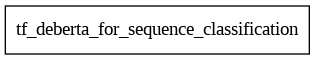

In [80]:
from keras.utils import plot_model

plot_model(model)

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [82]:
num_epochs = 2
batches_per_epoch = len(tokenized_dataset["train"]) // BATCH_SIZE
total_train_steps = int(batches_per_epoch * num_epochs)

In [83]:
optimizer, schedule = create_optimizer(init_lr=2e-5,num_warmup_steps=0, num_train_steps=total_train_steps)

In [84]:
model.compile(optimizer=optimizer,
    metrics=["accuracy"])

# model.compile(optimizer='adam',
#     metrics=["accuracy"])


In [85]:
history=model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=2
    # ,callbacks=callback
    )

Epoch 1/2


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


1211/1211 [==============================] - 472s 276ms/step - loss: 0.2517 - accuracy: 0.9445 - val_loss: 0.0090 - val_accuracy: 0.9986
Epoch 2/2
1211/1211 [==============================] - 265s 219ms/step - loss: 0.0094 - accuracy: 0.9988 - val_loss: 0.0059 - val_accuracy: 0.9991


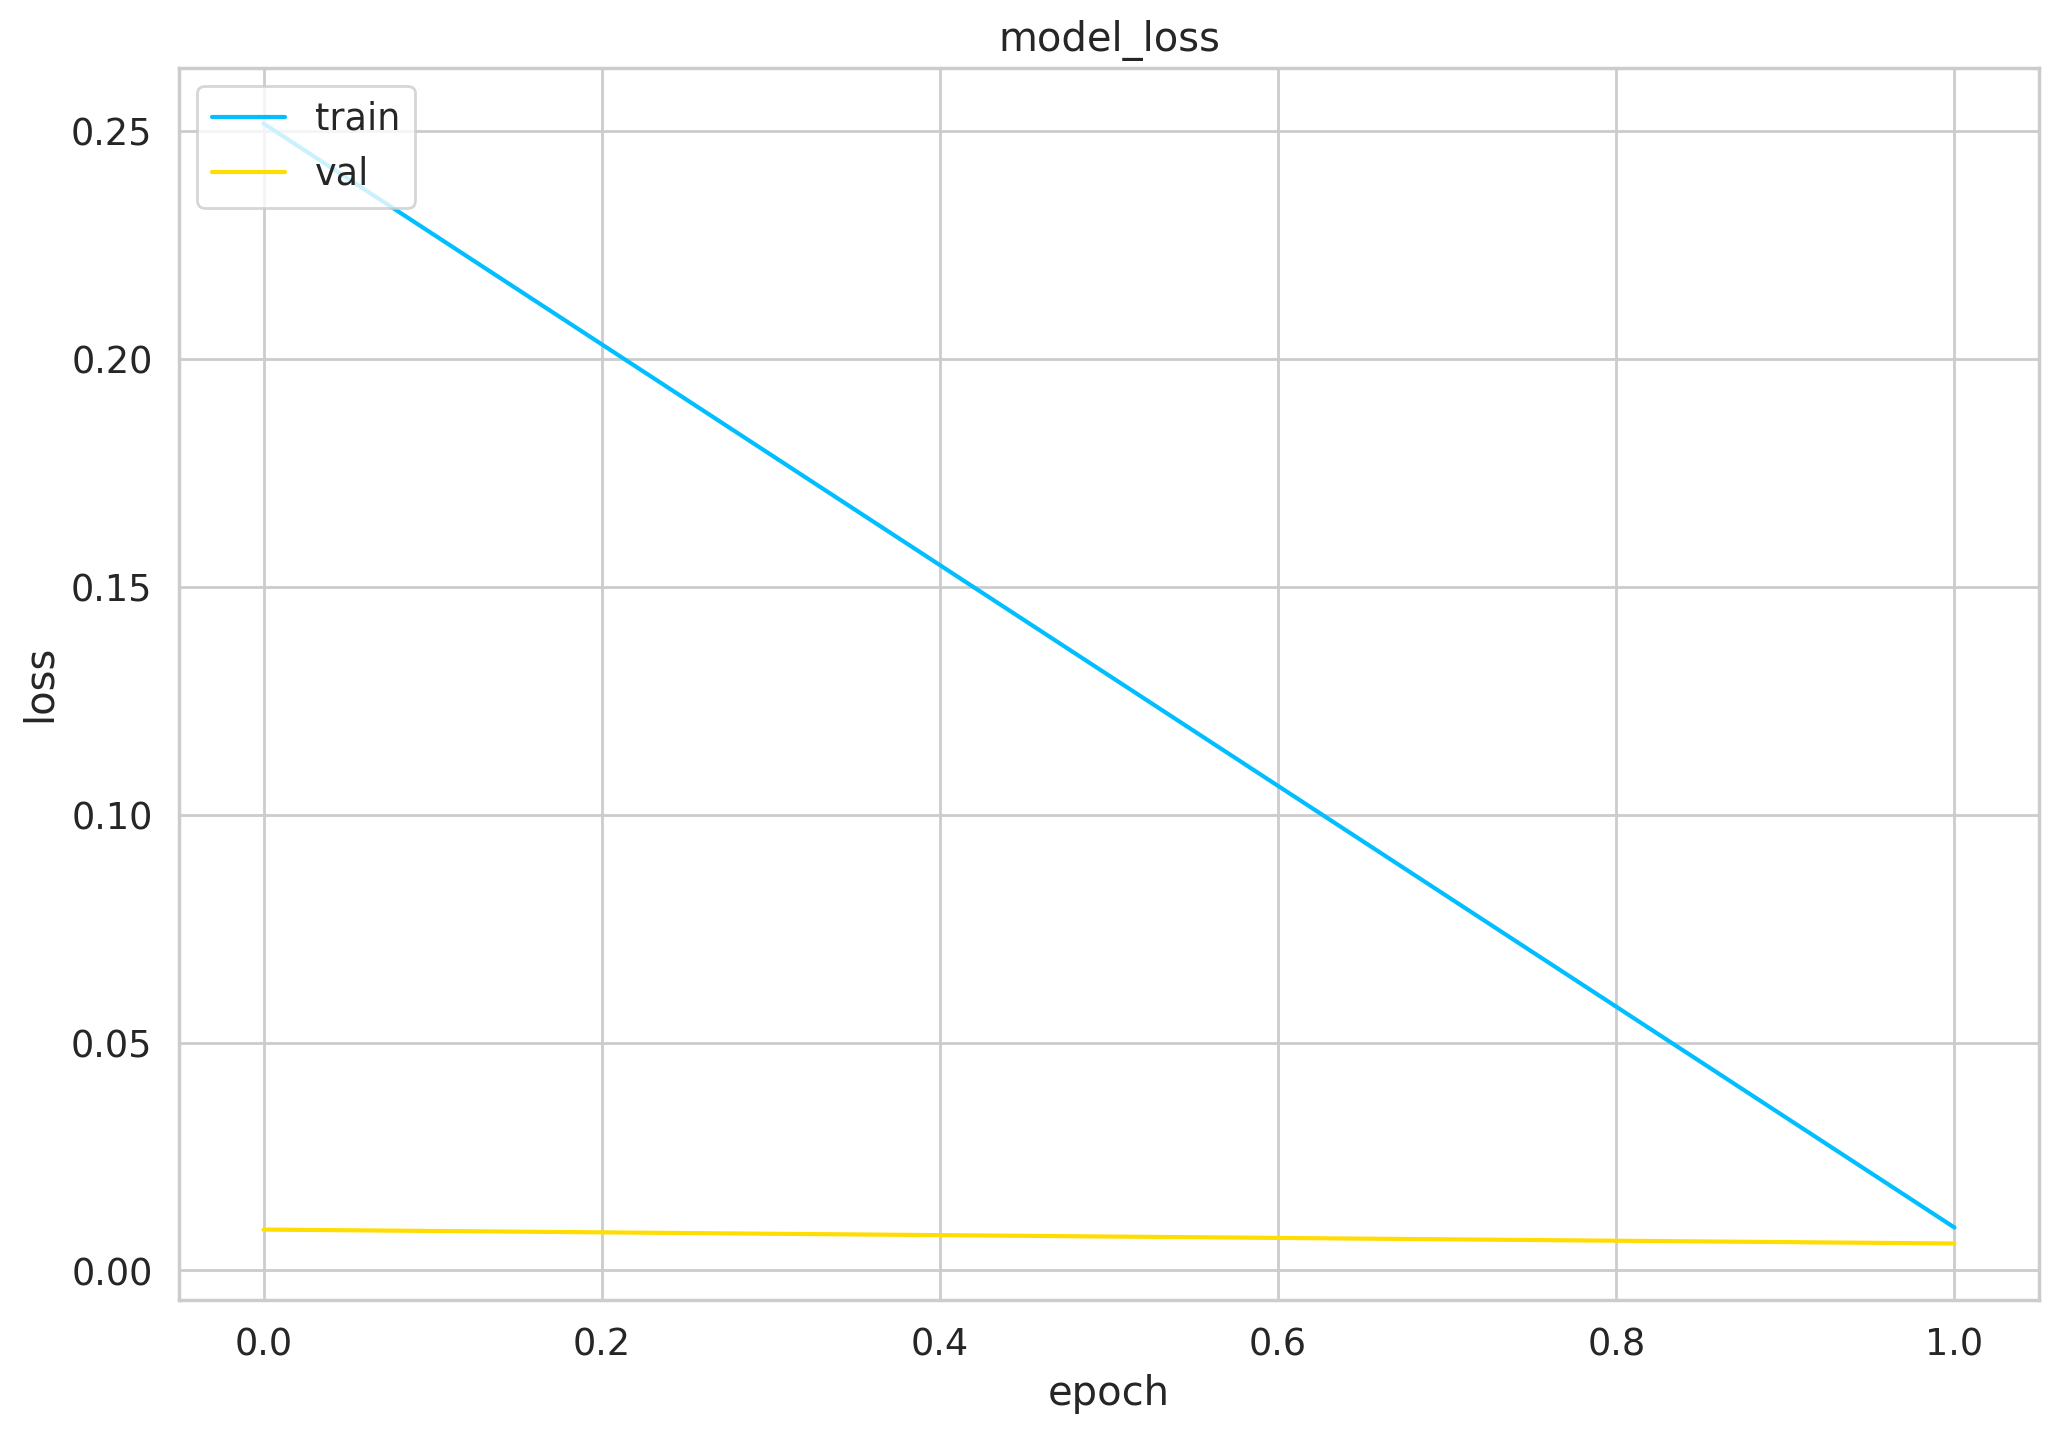

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

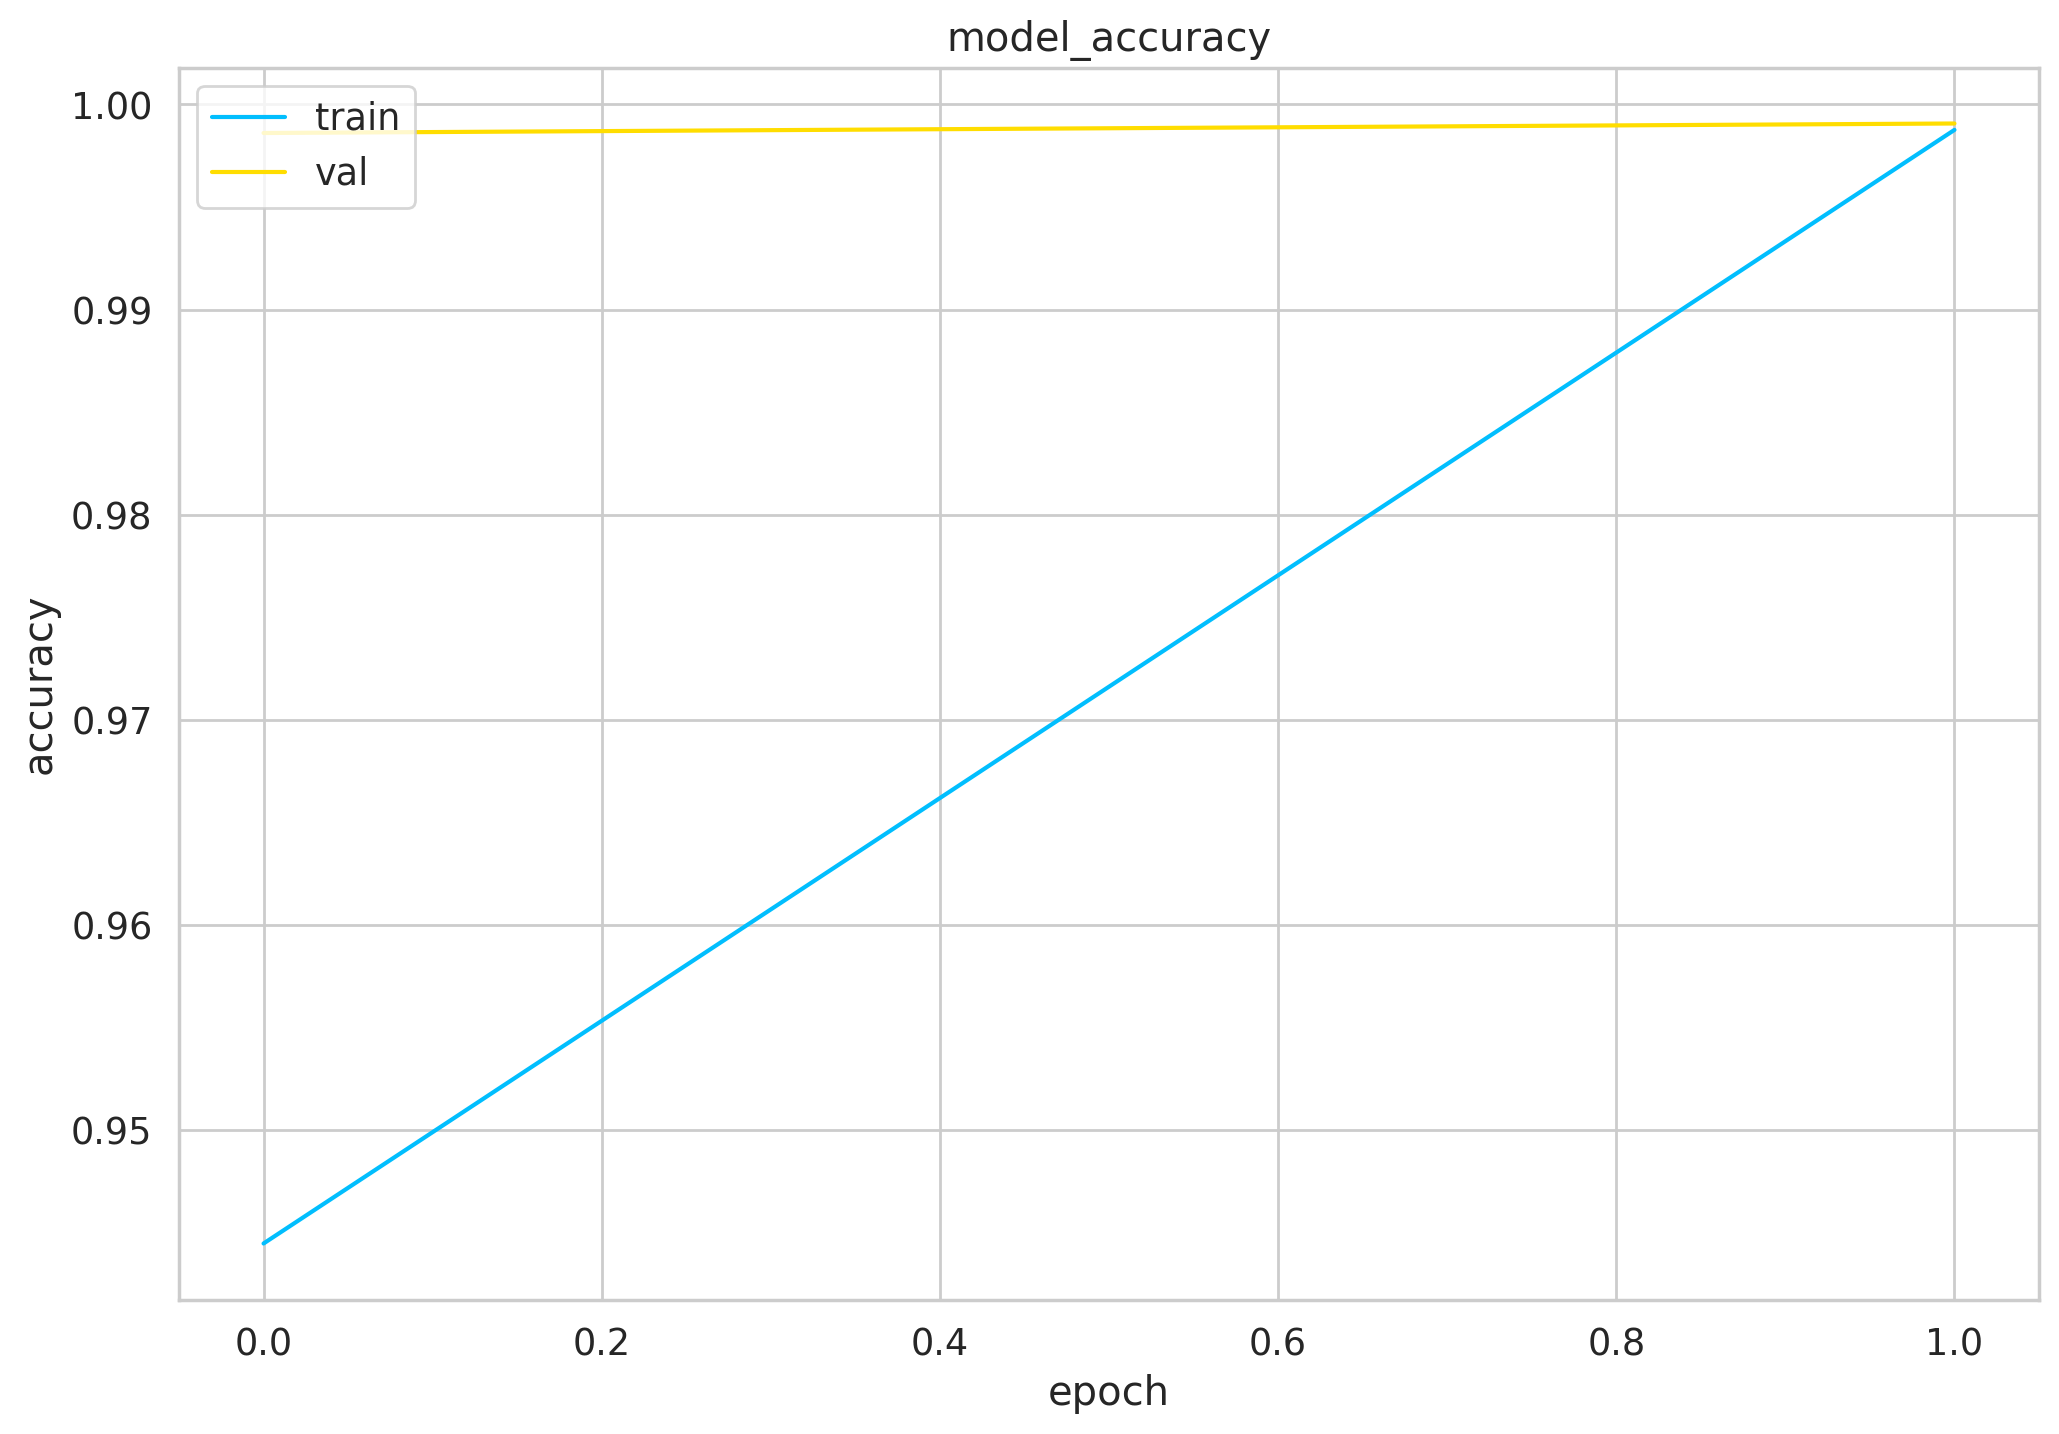

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [88]:
predicted = []
labels = []

for input, label in val_dataset:
  predicted.append(model(**input).logits)
  labels.append(label.numpy())

In [89]:

print(np.concatenate([np.array(labels[:-1]).flatten(),np.array(labels[-1]).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()]))


[23  6 14 ...  7  9 22]
[23  6 14 ...  7  9 22]


In [90]:
pred=np.concatenate([np.array(labels[:-1]).flatten(),np.array(labels[-1]).flatten()])
lab=np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])


[[100   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0  21   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0  84   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0 114   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  30   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  77   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  10   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  75   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 100   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 

Text(0.5, 139.24999999999997, 'Predicted')

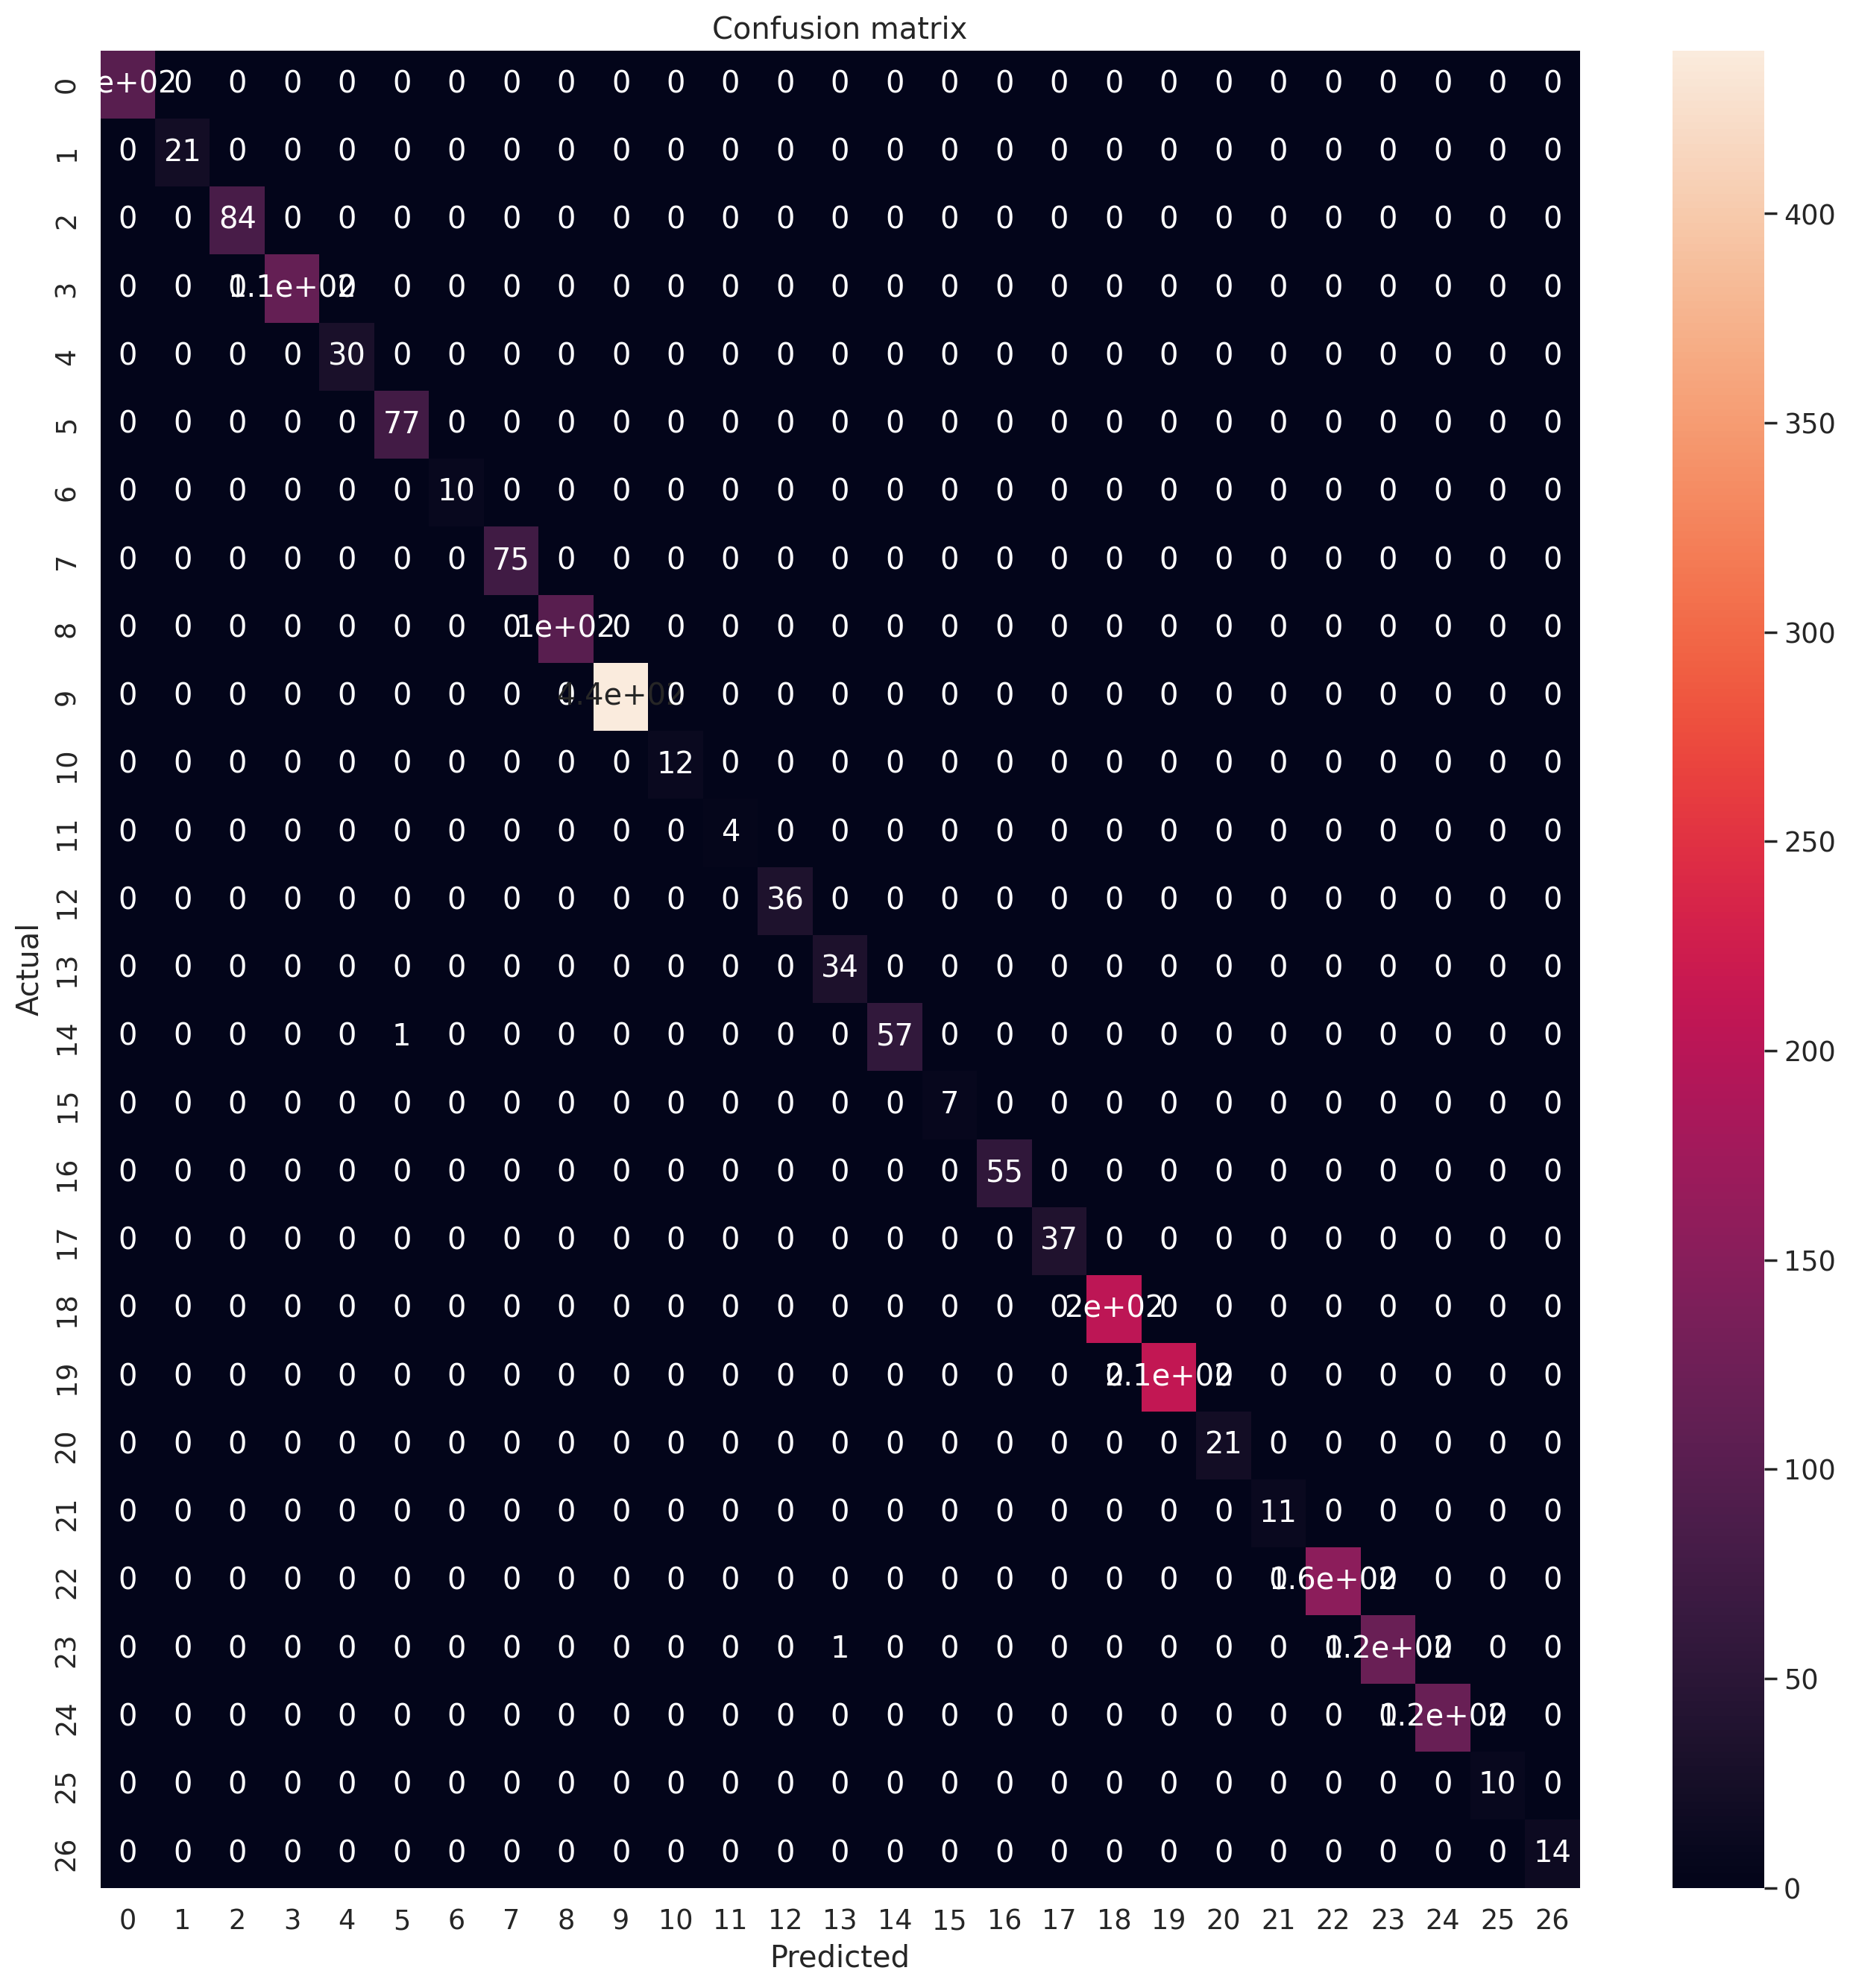

In [91]:
cm = confusion_matrix(lab, pred)
print(cm)
plt.figure(figsize=(16,16))

sns.heatmap(cm, annot=True,)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')


In [93]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/IntentClassification/saved_model/intent_classifier')

In [94]:
inputs = tokenizer(["Please how do i go about the account creation? ",
                    "After setting up my account, i feel like i need to change it. How do i go about that?",
                    "how do i know how much i need to pay?",
                    "purchased a product, which i now want to change",
                    "Could you help me with checking the status of my refund?",
                    "I need help to check the cancellation penalties",
                     "the show was postponed, how do I get a reimbursement?",
                "can u ask an agent how i could set up my fucking shipping address, please?",
                "	the show was postponed, what do i have to do to obtain a reimbursement?",
                "I can't find my invoices, what do I have to do to see them?"
"you're not helping, I need help speaking with someone"

                    ], padding=True,return_tensors="tf")

logits = model(**inputs).logits
outputs=tf.argmax(logits,axis=-1).numpy()

In [95]:
reverse_dict_intents={i:intents[i] for i in range(len(intents))}
print(reverse_dict_intents)

{0: 'delete_account', 1: 'newsletter_subscription', 2: 'recover_password', 3: 'get_refund', 4: 'check_payment_methods', 5: 'complaint', 6: 'registration_problems', 7: 'check_invoices', 8: 'change_order', 9: 'payment_issue', 10: 'change_shipping_address', 11: 'cancel_order', 12: 'check_cancellation_fee', 13: 'track_refund', 14: 'review', 15: 'place_order', 16: 'check_refund_policy', 17: 'delivery_options', 18: 'contact_customer_service', 19: 'create_account', 20: 'switch_account', 21: 'edit_account', 22: 'get_invoice', 23: 'track_order', 24: 'contact_human_agent', 25: 'delivery_period', 26: 'set_up_shipping_address'}


In [96]:
results=[]
for i in outputs:
  print(reverse_dict_intents[i])
  results.append(reverse_dict_intents[i])

create_account
edit_account
check_payment_methods
change_order
track_refund
check_cancellation_fee
get_refund
set_up_shipping_address
get_refund
check_invoices


In [98]:

inputs_strings=[
    "Please how do i go about the account creation? ",
                    "After setting up my account, i feel like i need to change it. How do i go about that?",
                    "how do i know how much i need to pay?",
                    "purchased a product, which i now want to change",
                    "Could you help me with checking the status of my refund?",
                    "I need help to check the cancellation penalties",
                     "the show was postponed, how do I get a reimbursement?",
                "can u ask an agent how i could set up my fucking shipping address, please?",
                "	the show was postponed, what do i have to do to obtain a reimbursement?",
                "I can't find my invoices, what do I have to do to see them?"
"you're not helping, I need help speaking with someone"

]

In [99]:
data ={
    "Query":inputs_strings,
    "Prediciton Intent":results
}
pprint(data)


{'Prediciton Intent': ['create_account',
                       'edit_account',
                       'check_payment_methods',
                       'change_order',
                       'track_refund',
                       'check_cancellation_fee',
                       'get_refund',
                       'set_up_shipping_address',
                       'get_refund',
                       'check_invoices'],
 'Query': ['Please how do i go about the account creation? ',
           'After setting up my account, i feel like i need to change it. How '
           'do i go about that?',
           'how do i know how much i need to pay?',
           'purchased a product, which i now want to change',
           'Could you help me with checking the status of my refund?',
           'I need help to check the cancellation penalties',
           'the show was postponed, how do I get a reimbursement?',
           'can u ask an agent how i could set up my fucking shipping address, '
       

In [100]:
import pandas as pd

df = pd.DataFrame(data)
df



,Query,Prediciton Intent
0,Please how do i go about the account creation?,create_account
1,"After setting up my account, i feel like i nee...",edit_account
2,how do i know how much i need to pay?,check_payment_methods
3,"purchased a product, which i now want to change",change_order
4,Could you help me with checking the status of ...,track_refund
5,I need help to check the cancellation penalties,check_cancellation_fee
6,"the show was postponed, how do I get a reimbur...",get_refund
7,can u ask an agent how i could set up my fucki...,set_up_shipping_address
8,"\tthe show was postponed, what do i have to do...",get_refund
9,"I can't find my invoices, what do I have to do...",check_invoices
